In [13]:
# Standard libraries for data analysis and visualization

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from scipy.stats import norm, skew 
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SKlearn modules for data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# SKlearn modules for model selection 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import tree

# SKlearn modules for model evaluations
from sklearn import metrics
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import _name_estimators
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
import operator
import math

# Personal class with some especific recurrent methods
import importlib
import formulas
importlib.reload(formulas)

<module 'formulas' from '/Users/pedrobustillo/AI_Business/Python_ML/formulas.py'>

In [14]:
# the data base is:
df = pd.read_csv("../../AI_Business/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model_ii.csv", sep="," )
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Data Analysis

In [15]:
data = formulas.ExploringData(df)
data.basic_database()
data.missing_values()
data.class_balance()

Number of elements: 69993
Dimension: 2
Rows, Columns: (3333, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins   

In [16]:
features_to_drop = ['State','Area Code','Phone']
df1 = df.copy()
df1 = df1.drop(columns=features_to_drop)
#df1.head(3)

Lets transform the categorical variables into binary variables

In [17]:
# Since these are simple transformations (to 1 or 0): we can do it manually, or use pd.get_dummies(df1[''])
# Manually:
df1["Int'l Plan"]=df1["Int'l Plan"].replace(["no","yes"],[0,1])
# get_dummies
df1_dummies=pd.get_dummies(df1["VMail Plan"])
df1["VMail Plan"]=df1_dummies["yes"]

In [18]:
# Transform the label class column (target column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1["Churn?"])
df1["Churn?"]=le.transform(df1["Churn?"])
df1.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


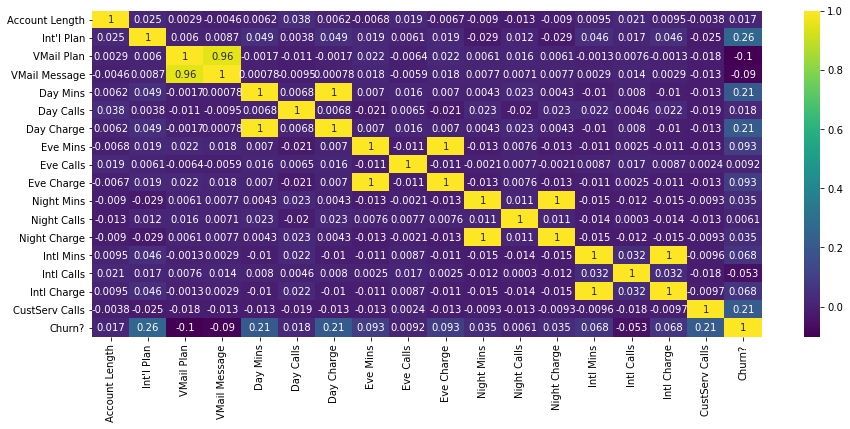

In [19]:
#num_cols = list(set(df._get_numeric_data().columns))
data_corre = formulas.CorrelationMatrix(df1,df1.columns)
data_corre.correlation_matrix()

In [20]:
#VIF: Variable_Inflation_factor
def check_vif(db):
    col = db.columns.tolist()[:-1]
    vif = pd.DataFrame()
    var=db[col].assign(constant=1)# a constant variable is required for the method to work.
    vif["Features"]=col
    vif["VIF"]=[variance_inflation_factor(var.values,i) for i in range(len(col))]
    return(vif)

check_vif(df1)

,Features,VIF
0,Account Length,1.004366e+00
1,Int'l Plan,1.008221e+00
2,VMail Plan,1.190453e+01
3,VMail Message,1.190351e+01
4,Day Mins,1.047616e+07
5,Day Calls,1.004704e+00
6,Day Charge,1.047617e+07
7,Eve Mins,2.237334e+06
8,Eve Calls,1.002310e+00
9,Eve Charge,2.237335e+06


In [21]:
features_to_drop = ['VMail Plan','Day Mins','Eve Mins','Night Mins','Intl Mins']
df1 = df1.drop(columns=features_to_drop)

In [22]:
# Check VIF again
check_vif(df1)

,Features,VIF
0,Account Length,1.003211
1,Int'l Plan,1.007353
2,VMail Message,1.000993
3,Day Calls,1.003825
4,Day Charge,1.003665
5,Eve Calls,1.001254
6,Eve Charge,1.001818
7,Night Calls,1.001836
8,Night Charge,1.002262
9,Intl Calls,1.002654


In [23]:
# This is a theoretical demostration, using sklearn linear regression R^2

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
col1 = df1.columns.tolist()
col1.remove("Day Charge")
y1 = df1["Day Charge"]
x1 = df1[col1]
reg = LinearRegression().fit(x1,y1)
r2 = reg.score(x1,y1)
vif = 1/(1-r2)
print("R^2:", r2,"VIF:", vif)
predict1=reg.predict(x1)
r22 = r2_score(y1,predict1)
vif2 = 1/(1-r22)
print("R^2:", r22,"VIF:", vif2)

R^2: 0.04777772443110595 VIF: 1.0501749703372163
R^2: 0.04777772443110595 VIF: 1.0501749703372163


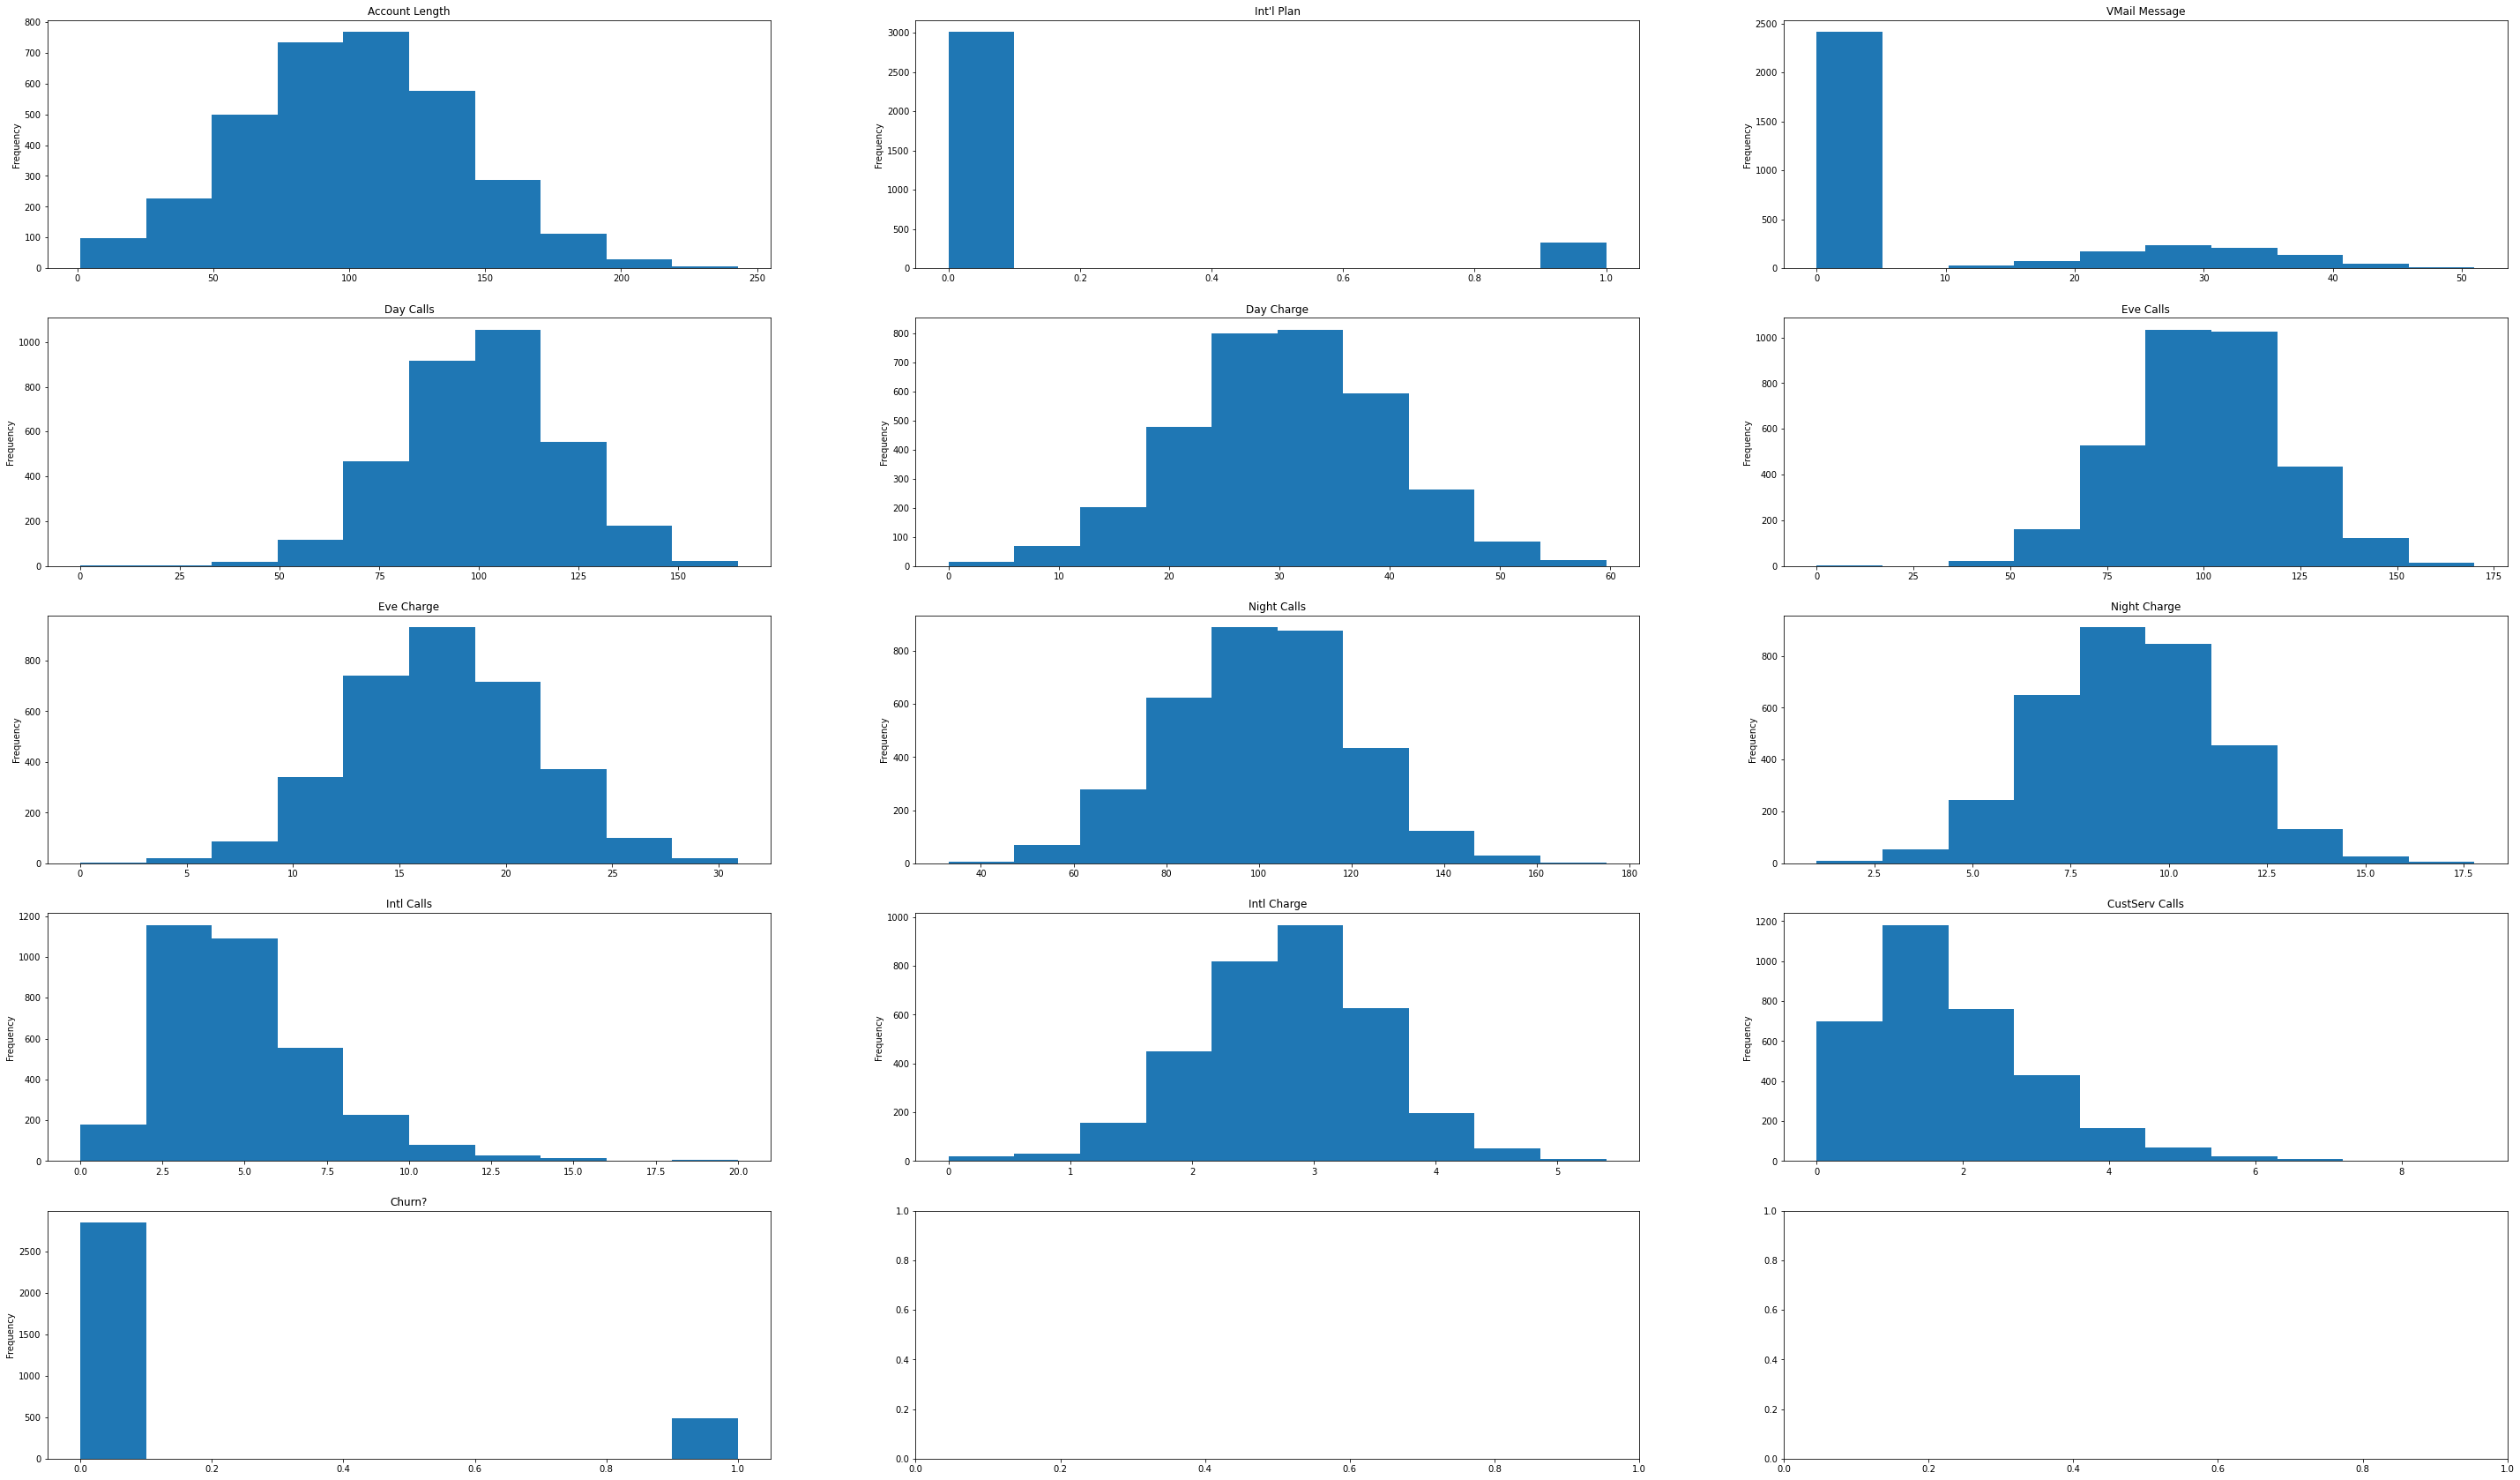

In [24]:
# Check each feature distribution variable: fdist
# Use Plotting class
fdist=formulas.Plotting(df1,df1.columns)
fdist.features_plotting()
# We can see that most of the features (except the bynaries) are close to a normal distribution.
# === > check 'VMail Message'!!

In [25]:
# Using the original DataFrame: Call rates analysis
Intl_rate_IntlPlan = np.mean(df.loc[df["Int'l Plan"]=="yes","Intl Charge"]/df.loc[df["Int'l Plan"]=="yes","Intl Mins"])
Intl_rate_no_IntlPlan = np.mean(df.loc[df["Int'l Plan"]=="no","Intl Charge"]/df.loc[df["Int'l Plan"]=="no","Intl Mins"])
rate_day_churn = np.mean(df.loc[df["Churn?"]=="True.","Day Charge"]/df.loc[df["Churn?"]=="True.","Day Mins"])
rate_day_nchurn = np.mean(df.loc[df["Churn?"]=="False.","Day Charge"]/df.loc[df["Churn?"]=="False.","Day Mins"])
rate_eve_churn = np.mean(df.loc[df["Churn?"]=="True.","Eve Charge"]/df.loc[df["Churn?"]=="True.","Eve Mins"])
rate_eve_nchurn = np.mean(df.loc[df["Churn?"]=="False.","Eve Charge"]/df.loc[df["Churn?"]=="False.","Eve Mins"])
rate_night_churn = np.mean(df.loc[df["Churn?"]=="True.","Night Charge"]/df.loc[df["Churn?"]=="True.","Night Mins"])
rate_night_nchurn = np.mean(df.loc[df["Churn?"]=="False.","Night Charge"]/df.loc[df["Churn?"]=="False.","Night Mins"])
rate_intl_churn = np.mean(df.loc[df["Churn?"]=="True.","Intl Charge"]/df.loc[df["Churn?"]=="True.","Intl Mins"])
rate_intl_nchurn = np.mean(df.loc[df["Churn?"]=="False.","Intl Charge"]/df.loc[df["Churn?"]=="False.","Intl Mins"])
print("Intl rate with Intl plan is:"+" "+str(Intl_rate_IntlPlan)+""+" and with no Intl Plan is:"+" "+str(Intl_rate_no_IntlPlan))
print("Day rate churn is:"+" "+str(rate_day_churn)+""+" and day rate no churn is:"+" "+str(rate_day_nchurn))
print("Eve rate churn is:"+" "+str(rate_eve_churn)+""+" and eve rate no churn is:"+" "+str(rate_eve_nchurn))
print("Night rate churn is:"+" "+str(rate_night_churn)+""+" and night rate no churn is:"+" "+str(rate_night_nchurn))
print("Intl rate churn is:"+" "+str(rate_intl_churn)+""+" and intl rate no churn is:"+" "+str(rate_intl_nchurn))

Intl rate with Intl plan is: 0.27003827243897816 and with no Intl Plan is: 0.27005851825103055
Day rate churn is: 0.17000275572453427 and day rate no churn is: 0.17000331531507384
Eve rate churn is: 0.08500081707432333 and eve rate no churn is: 0.08500123332733626
Night rate churn is: 0.0450002247152355 and night rate no churn is: 0.0450003662063208
Intl rate churn is: 0.2700551798038714 and intl rate no churn is: 0.2700567785168089


In [26]:
view1 = df1.groupby(["Churn?"]).mean()
view1.loc[2]=view1.loc[1]/view1.loc[0]
view1

,Account Length,Int'l Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls
Churn?,,,,,,,,,,,,
0,100.793684,0.065263,8.604561,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,1.449825
1,102.664596,0.283644,5.115942,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,2.229814
2,1.018562,4.346156,0.594562,1.010493,1.181176,1.005223,1.067147,1.003411,1.025478,0.918504,1.053270,1.537989


In [27]:
from sklearn.preprocessing import MinMaxScaler
df1_n = df1.copy()
scaler = MinMaxScaler()
scaler.fit(df1_n.values)
values_n = scaler.transform(df1_n.values)
df1_n[df1_n.columns]=values_n
df1_n.head()

,Account Length,Int'l Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0.524793,0.0,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.333333,0.0


In [28]:
# Assigning the values to x and y
col=df1_n.columns.tolist()
col.remove("Churn?")
x=df1_n[col]
y=df1_n["Churn?"]


In [29]:
# Create the split between train and test data
from sklearn.model_selection import train_test_split
# Split for the standardized data == label class unbalance ==
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30, random_state=1, stratify=y)
# Reset index
X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)
Y_train.reset_index(drop=True, inplace = True)
Y_test.reset_index(drop=True, inplace = True)

In [30]:
balance = formulas.ClassResample(X_train,Y_train,1,0)
balance.resampling()

Number of class 1 examples before: 338
Number of class 0 examples before: 1995
Number of class 1 examples after: 1995
The new x_bal shape is: (3990, 12)
The new y_bal shape is: (3990,)


In [31]:
# Note: These resampled variables are array; not a DataFrame!!!.
x_resampled = balance.x_bal
y_resampled = balance.y_bal

In [32]:
# Split for the standardized data == after resampling ==
X_train_bal,X_test_bal,Y_train_bal,Y_test_bal=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=2, stratify=y_resampled)

# Classifier Models

General View

In [33]:
# The classifiers
lr =  LogisticRegression(C=1,random_state=10)
dt =  DecisionTreeClassifier(random_state=11)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 10, p=2, metric="minkowski")

classifiers = [lr,dt,gnb,knn]

# DataFrame for scores:
col = ["Acc","Recall","Precision","F1"]
index=["Logist Regression", "Decision Tree", "GaussianNB", "K_Neighbors"]
results = pd.DataFrame({}, columns=col, index=index)

# For all classifiers
def models(classifier,x,x_test,y,y_test):
    i=0
    for cls in classifier:
        model = cls.fit(x,y)
        
        result=[]
        class_predict = model.predict(x_test)
        accuracy_score = metrics.accuracy_score(y_test,class_predict).round(3)
        result.append(accuracy_score)
        recall_score = metrics.recall_score(y_test,class_predict).round(3)
        result.append(recall_score)
        precision_score = metrics.precision_score(y_test, class_predict).round(3)
        result.append(precision_score)
        f1_score= metrics.f1_score(y_test,class_predict).round(3)
        result.append(f1_score)
        results.loc[index[i]]=result
        i+=1
    return results

In [34]:
print("With original Data / non resampled \n")
models(classifiers,X_train,X_test,Y_train,Y_test)

With original Data / non resampled 



,Acc,Recall,Precision,F1
Logist Regression,0.858,0.159,0.535,0.245
Decision Tree,0.913,0.71,0.696,0.703
GaussianNB,0.836,0.372,0.425,0.397
K_Neighbors,0.881,0.207,0.882,0.335


In [35]:
print("With resampled data \n")
models(classifiers,X_train_bal,X_test_bal,Y_train_bal,Y_test_bal)

With resampled data 



,Acc,Recall,Precision,F1
Logist Regression,0.786,0.768,0.797,0.782
Decision Tree,0.961,0.992,0.934,0.962
GaussianNB,0.815,0.744,0.867,0.801
K_Neighbors,0.865,0.878,0.856,0.867


In [36]:
print("With resampled data and original test data \n")
models(classifiers,X_train_bal,X_test,Y_train_bal,Y_test)

With resampled data and original test data 



,Acc,Recall,Precision,F1
Logist Regression,0.763,0.724,0.348,0.47
Decision Tree,0.917,0.738,0.704,0.721
GaussianNB,0.856,0.717,0.502,0.591
K_Neighbors,0.82,0.779,0.433,0.557


Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV
params = {"C":[0.001,0.1,1,100.0]}
grid = GridSearchCV(estimator=lr,
                    param_grid=params,
                    cv=10,
                    scoring="recall")
grid.fit(X_train_bal,Y_train_bal)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r" % 
          (grid.cv_results_['mean_test_score'][r],
           grid.cv_results_['std_test_score'][r] / 2.0,
           grid.cv_results_['params'][r]))
    
print()
print('Best parameters: %s' % grid.best_params_)
print()
print('Recall: %.2f' % grid.best_score_)

0.434 +/- 0.03 {'C': 0.001}
0.747 +/- 0.03 {'C': 0.1}
0.767 +/- 0.03 {'C': 1}
0.770 +/- 0.02 {'C': 100.0}

Best parameters: {'C': 100.0}

Recall: 0.77


In [38]:
c=[0.001,0.1,1,100.0]
index_result=X_train.columns.tolist()
index_result.append("Intercept")
index_result.append("Recall")
index_result.append("Accuracy")
result=pd.DataFrame({}, index=index_result)
cv_data=pd.DataFrame({}, index=index_result)

skf=StratifiedKFold(n_splits=10)
for cs in c:
    lr = LogisticRegression(C=cs, random_state=40)
    i=1
    for train, test in skf.split(X_train_bal,Y_train_bal):
        lr.fit(X_train_bal[train],Y_train_bal[train])
        coeff_cv=lr.coef_[0].tolist()
        inter_cv=lr.intercept_[0].tolist()
        coeff_cv.append(inter_cv)
        predict_cv = lr.predict(X_train_bal[test])
        accuracy_cv = metrics.accuracy_score(Y_train_bal[test],predict_cv).round(3)
        recall_cv = metrics.recall_score(Y_train_bal[test],predict_cv).round(3)
        coeff_cv.append(recall_cv)
        coeff_cv.append(accuracy_cv)
        cv_data[i]=coeff_cv
        i+=1  
      
    cv_data["mean"]= cv_data.mean(axis=1)
    result[cs]=cv_data["mean"]

result    

,0.001,0.100,1.000,100.000
Account Length,0.007579,0.320160,0.638648,0.762221
Int'l Plan,0.132485,1.607749,2.273893,2.488644
VMail Message,-0.042569,-0.774671,-1.080473,-1.169016
Day Calls,0.003029,0.099148,0.119325,0.107070
Day Charge,0.061929,2.225719,4.239755,4.989459
Eve Calls,0.001868,0.073291,0.089471,0.076810
Eve Charge,0.024003,1.029550,2.259481,2.775128
Night Calls,-0.002180,-0.145735,-0.340052,-0.422590
Night Charge,0.009782,0.497551,1.126062,1.388288
Intl Calls,-0.006583,-0.304552,-0.715198,-0.901066


In [39]:
lr = LogisticRegression(C=100, random_state=50)
lr.fit(X_train_bal, Y_train_bal)
predict_lr = lr.predict(X_test_bal)
predict_proba_lr= lr.predict_proba(X_test_bal)
performance_lr = formulas.SummaryMetrics(Y_test_bal,predict_lr,predict_proba_lr[:,1])
performance_lr.performance_metrics()
performance_lr.confusion_matrix()
performance_lr.matrix

Accuracy 0.783625730994152
ROC area 0.841
PR area  0.821


,Pre_No_ratio,Pre_Yes_ratio,Total_ratio,Pre_No,Pre_Yes,Total_Act,Precision,Recall,F1
No,0.801,0.199,1,480,119,599,0.774,0.801,0.787
Yes,0.234,0.766,1,140,458,598,0.794,0.766,0.78
T_Pre,--,--,--,620,577,1197,--,--,--


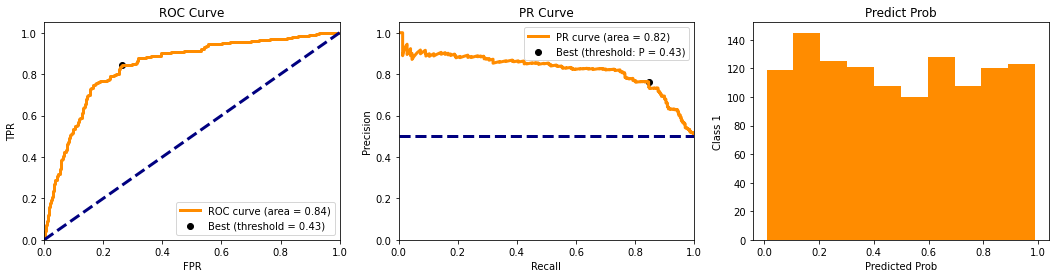

In [40]:
# We can see the effect of a resampled data (balanced class labels) and how the best threshold p= 0.43 is 
# very close to the one used by Logistic Regression (p = 0.5)
performance_lr.plotting_metrics_curves()

Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV
params = {"min_impurity_decrease":[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
          "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    cv=10,
                    scoring="recall")
grid.fit(X_train_bal,Y_train_bal)

#for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    #print("%0.3f +/- %0.2f %r" % 
          #(grid.cv_results_['mean_test_score'][r],
           #grid.cv_results_['std_test_score'][r] / 2.0,
           #grid.cv_results_['params'][r]))
    
print()
print('Best parameters: %s' % grid.best_params_)
print()
print('Recall: %.2f' % grid.best_score_)


Best parameters: {'max_depth': 18, 'min_impurity_decrease': 0.0}

Recall: 0.99


In [42]:
from sklearn.model_selection import GridSearchCV
params = {"min_impurity_decrease":[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
          "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    cv=10,
                    scoring="recall")
grid.fit(X_train,Y_train)

#for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    #print("%0.3f +/- %0.2f %r" % 
          #(grid.cv_results_['mean_test_score'][r],
           #grid.cv_results_['std_test_score'][r] / 2.0,
           #grid.cv_results_['params'][r]))
    
print()
print('Best parameters: %s' % grid.best_params_)
print()
print('Recall: %.2f' % grid.best_score_)


Best parameters: {'max_depth': 15, 'min_impurity_decrease': 0.0}

Recall: 0.75


In [43]:
# In summary
dt =  DecisionTreeClassifier(max_depth= 16, random_state=11)
dt.fit(X_train_bal, Y_train_bal)
predict_dt = dt.predict(X_test_bal)
predict_proba_dt= dt.predict_proba(X_test_bal)
performance_dt = formulas.SummaryMetrics(Y_test_bal,predict_dt,predict_proba_dt[:,1])
performance_dt.performance_metrics()
performance_dt.confusion_matrix()
performance_dt.matrix

Accuracy 0.9590643274853801
ROC area 0.96
PR area  0.964


,Pre_No_ratio,Pre_Yes_ratio,Total_ratio,Pre_No,Pre_Yes,Total_Act,Precision,Recall,F1
No,0.927,0.073,1,555,44,599,0.991,0.927,0.958
Yes,0.008,0.992,1,5,593,598,0.931,0.992,0.961
T_Pre,--,--,--,560,637,1197,--,--,--


Naive Bayes

In [44]:
gnb = GaussianNB()
gnb.fit(X_train_bal,Y_train_bal)
predict_gnb = gnb.predict(X_test_bal)
pred_proba_gnb = gnb.predict_proba(X_test_bal)
metrics_gnb = formulas.SummaryMetrics(Y_test_bal,predict_gnb,pred_proba_gnb[:,1])
metrics_gnb.performance_metrics()
metrics_gnb.confusion_matrix()
metrics_gnb.matrix

Accuracy 0.8153717627401837
ROC area 0.856
PR area  0.834


,Pre_No_ratio,Pre_Yes_ratio,Total_ratio,Pre_No,Pre_Yes,Total_Act,Precision,Recall,F1
No,0.886,0.114,1,531,68,599,0.776,0.886,0.827
Yes,0.256,0.744,1,153,445,598,0.867,0.744,0.801
T_Pre,--,--,--,684,513,1197,--,--,--


In [45]:
# Using my class for categorical and continuous features
# Extract Categorical and continuous features. Create x and y databases.
columns = X_train.columns.tolist()
dfgnb = df.copy()
dfgnb = dfgnb[columns]
continuous = list(set(dfgnb._get_numeric_data().columns))
categorical = list(set(dfgnb.columns)-set(df._get_numeric_data().columns))
xnb = pd.DataFrame(X_train_bal,columns=columns)
xnb_test = pd.DataFrame(X_test_bal, columns=columns)
ynb=pd.DataFrame(Y_train_bal, columns=["Churn?"])
ynb_test=pd.DataFrame(Y_test_bal,columns=["Churn?"])


# call the class
gnb3 = formulas.BayesM(categorical,continuous)
gnb3.fit(xnb,ynb["Churn?"])
predict_gnb3 = gnb3.predict(xnb_test)
pred_proba_gnb3 = gnb3.predict_proba(xnb_test)

metrics_gnb3 = formulas.SummaryMetrics(ynb_test,predict_gnb3,pred_proba_gnb3[:,1])
metrics_gnb3.performance_metrics()
metrics_gnb3.confusion_matrix()
metrics_gnb3.matrix

Accuracy 0.8170426065162907
ROC area 0.866
PR area  0.853


,Pre_No_ratio,Pre_Yes_ratio,Total_ratio,Pre_No,Pre_Yes,Total_Act,Precision,Recall,F1
No,0.818,0.182,1,490,109,599,0.817,0.818,0.817
Yes,0.184,0.816,1,110,488,598,0.817,0.816,0.816
T_Pre,--,--,--,600,597,1197,--,--,--


K_Neighbours

In [46]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[5,6,7,8,9,10],
          "weights":["uniform","distance"]}
grid = GridSearchCV(estimator=knn,
                    param_grid=params,
                    cv=10,
                    scoring="recall")
grid.fit(X_train_bal,Y_train_bal)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r" % 
          (grid.cv_results_['mean_test_score'][r],
           grid.cv_results_['std_test_score'][r] / 2.0,
           grid.cv_results_['params'][r]))
    
print()
print('Best parameters: %s' % grid.best_params_)
print()
print('Recall: %.2f' % grid.best_score_)

0.951 +/- 0.01 {'n_neighbors': 5, 'weights': 'uniform'}
0.986 +/- 0.01 {'n_neighbors': 5, 'weights': 'distance'}
0.898 +/- 0.01 {'n_neighbors': 6, 'weights': 'uniform'}
0.988 +/- 0.00 {'n_neighbors': 6, 'weights': 'distance'}
0.921 +/- 0.01 {'n_neighbors': 7, 'weights': 'uniform'}
0.990 +/- 0.00 {'n_neighbors': 7, 'weights': 'distance'}
0.877 +/- 0.02 {'n_neighbors': 8, 'weights': 'uniform'}
0.990 +/- 0.00 {'n_neighbors': 8, 'weights': 'distance'}
0.906 +/- 0.02 {'n_neighbors': 9, 'weights': 'uniform'}
0.990 +/- 0.00 {'n_neighbors': 9, 'weights': 'distance'}
0.884 +/- 0.02 {'n_neighbors': 10, 'weights': 'uniform'}
0.989 +/- 0.00 {'n_neighbors': 10, 'weights': 'distance'}

Best parameters: {'n_neighbors': 7, 'weights': 'distance'}

Recall: 0.99


In [47]:
# In summary
knn = KNeighborsClassifier(n_neighbors = 7, p=2, metric="minkowski")
knn.fit(X_train_bal,Y_train_bal)
predict_knn = knn.predict(X_test_bal)
pred_proba_knn = knn.predict_proba(X_test_bal)
metrics_knn = formulas.SummaryMetrics(Y_test_bal,predict_knn,pred_proba_knn[:,1])
metrics_knn.performance_metrics()
metrics_knn.confusion_matrix()
metrics_knn.matrix

Accuracy 0.8621553884711779
ROC area 0.935
PR area  0.93


,Pre_No_ratio,Pre_Yes_ratio,Total_ratio,Pre_No,Pre_Yes,Total_Act,Precision,Recall,F1
No,0.808,0.192,1,484,115,599,0.906,0.808,0.854
Yes,0.084,0.916,1,50,548,598,0.827,0.916,0.869
T_Pre,--,--,--,534,663,1197,--,--,--


Summary of the classifiers models after parameter tuning

In [48]:
classifiers = [lr,dt,gnb,knn]
models(classifiers,X_train_bal,X_test_bal,Y_train_bal,Y_test_bal)

,Acc,Recall,Precision,F1
Logist Regression,0.784,0.766,0.794,0.78
Decision Tree,0.959,0.992,0.931,0.96
GaussianNB,0.815,0.744,0.867,0.801
K_Neighbors,0.862,0.916,0.827,0.869


Voting Classifier

In [49]:
vote = VotingClassifier(estimators=[("Logistic Regression",lr),
                                     ("Decision Tree",dt),
                                     ("GaussianNB",gnb),
                                     ("K_Neighbors",knn)],voting="soft")
vote.fit(X_train_bal,Y_train_bal)
predict_vote = vote.predict(X_test_bal)
accuracy_vote = metrics.accuracy_score(Y_test_bal,predict_vote).round(3)
recall_vote = metrics.recall_score(Y_test_bal,predict_vote).round(3)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test_bal,predict_vote).ravel()
print("Accuracy: ",accuracy_vote,"Recall: ", recall_vote)
print("True Neg: ",tn, ",False Positive: ",fp,",False Negative: ",fn,",True Positive: ",tp)

Accuracy:  0.923 Recall:  0.938
True Neg:  544 ,False Positive:  55 ,False Negative:  37 ,True Positive:  561


Business Implications